In [2]:
# This serves as a tutorial for how to use tensor_flow for regression

In [3]:
# imports
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
# seperate x and y
x = boston.data[:,5][:,None]
y = np.reshape(boston.target, (-1, 1))

In [5]:
X = tf.placeholder(shape=[None,1],dtype =tf.float32,name="X")
Y = tf.placeholder(shape=[None,1], dtype=tf.float32,name="Y")
A = tf.Variable(tf.random_normal(shape=[1,1]),name="A")
b = tf.Variable(tf.random_normal(shape=[1,1]),name = "b")
batch_size = 100
n_epochs = 50000
steps = 1000

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
#Create the model and loss function
model_output = tf.matmul(X,A) + b
loss = tf.reduce_mean(tf.square(Y- model_output))

#minimize the loss function 
grad_speed = 5e-7
my_opt = tf.train.GradientDescentOptimizer(grad_speed)
train_step = my_opt.minimize(loss)

In [7]:
# train the model
loss_vec =[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        permut = np.random.permutation(len(x))
        for j in range(0,len(x),batch_size):
            batch = permut[j:j+batch_size]
            Xs= x[batch]
            Ys = y[batch]
            
            sess.run(train_step, feed_dict={X: Xs, Y: Ys})
        temp_loss = sess.run(loss, feed_dict={X: x, Y:y})
        loss_vec.append(temp_loss)
        if epoch % steps ==0:
            (A_,b_) = sess.run([A,b])
            print('Epoch #%i A = %s b =%s' % (epoch, np.transpose(A_),b_))
            print('Loss = %.8f' % temp_loss)
            print("")
    [slope, y_intercept] = sess.run([A, b])
    prediction = sess.run(model_output,feed_dict={X:x})
    mse = mean_squared_error(y,prediction)
    print("Mean Squared Error (on training data): {:3}".format(mse))
    rmse = np.sqrt(mse)
    print("RMSE ( on training data): %f" % rmse)
    r2 = r2_score(y,prediction)
    print("R2 ( on training data): %.2f" % r2)
best_fit = []
for i in x:
    best_fit.append(slope[0]*i+y_intercept[0])

Epoch #0 A = [[1.0071898]] b =[[-0.971296]]
Loss = 370.84176636

Epoch #1000 A = [[1.603055]] b =[[-0.8801917]]
Loss = 249.22018433

Epoch #2000 A = [[2.0691397]] b =[[-0.8094468]]
Loss = 174.85444641

Epoch #3000 A = [[2.4329054]] b =[[-0.7547708]]
Loss = 129.47729492

Epoch #4000 A = [[2.7162933]] b =[[-0.7127168]]
Loss = 101.81783295

Epoch #5000 A = [[2.9394357]] b =[[-0.6801375]]
Loss = 84.77682495

Epoch #6000 A = [[3.1149807]] b =[[-0.6550781]]
Loss = 74.30355072

Epoch #7000 A = [[3.251165]] b =[[-0.63619864]]
Loss = 67.95635986

Epoch #8000 A = [[3.3575013]] b =[[-0.6220078]]
Loss = 64.07926178

Epoch #9000 A = [[3.4405277]] b =[[-0.6114359]]
Loss = 61.70898056

Epoch #10000 A = [[3.5063205]] b =[[-0.60360575]]
Loss = 60.23927689

Epoch #11000 A = [[3.5581934]] b =[[-0.5979904]]
Loss = 59.33466339

Epoch #12000 A = [[3.5990605]] b =[[-0.5940811]]
Loss = 58.77928162

Epoch #13000 A = [[3.6302054]] b =[[-0.5917068]]
Loss = 58.44879532

Epoch #14000 A = [[3.6548185]] b =[[-0.5903

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


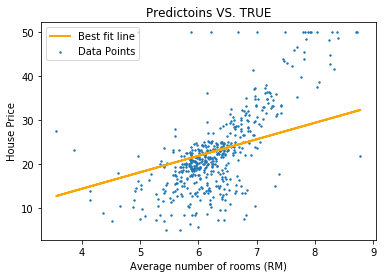

In [9]:
fig,ax = plt.subplots()

ax.set_title("Predictoins VS. TRUE")
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")

ax.scatter(x, y, s=2, label='Data Points')
ax.plot(x, np.array(best_fit), '-', lw=2, color="#f9a602", label='Best fit line')
ax.legend(loc='upper left')

fig.show()


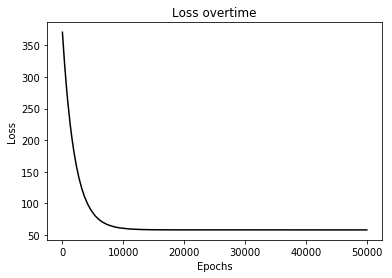

In [10]:
fig,ax = plt.subplots()
ax.set_title("Loss overtime")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.plot(loss_vec, 'k-')

fig.show()

